In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
from scipy.stats import pearsonr
import sklearn
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

from numpy import arange
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import balanced_accuracy_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [3]:
import os
os.getcwd()

'C:\\Users\\nikhi'

In [4]:
os.chdir(r'C:\Users\nikhi\Desktop\MSc DS\1-Machine Learning\project\Assignment 2')
df = pd.read_excel('TrainDataset2023.xls')

In [5]:
df.drop("ID",inplace=True,axis=1)

In [6]:
for i in df.columns:
    df[i].replace(999,np.nan, inplace=True)
df.dropna(subset=['pCR (outcome)'], inplace=True)
for col in df.columns:
    df[col].fillna(value= df[col].mode()[0],inplace=True)


In [7]:
df.isnull().sum().sum()

0

In [8]:
p_df= df

# Assigning X and Y

In [9]:
y_p = p_df['pCR (outcome)']
print(y_p.shape)
y_r = p_df['RelapseFreeSurvival (outcome)']
print(y_r.shape)

(395,)
(395,)


# PCA
and then Lasso

Clinical feat = p_df1

x1s

x1s_pca

In [10]:
# Clinical features
p_df1=p_df.iloc[:,0:12]
print(p_df1.shape)

(395, 12)


In [11]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1s = scaler.fit_transform(p_df1)

In [12]:
# PCA
pca1 = PCA(n_components=9)
x1s_pca = pca1.fit_transform(x1s)
print(pca1.explained_variance_ratio_)
print(sum(pca1.explained_variance_ratio_))

[0.25440098 0.12761075 0.1207475  0.09993692 0.08314793 0.08092796
 0.07084959 0.06310117 0.04973791]
0.9504607164681507


MRI feat = p_df2

x2s

x2s_pca

In [13]:
p_df2=p_df.iloc[:,12:119]
print(p_df2.shape)

(395, 107)


In [14]:
# normalisation
scaler = StandardScaler()
x2s = scaler.fit_transform(p_df2)

In [15]:
# PCA
pca2 = PCA(n_components=15)
pca2 = pca2.fit(x2s)
x2s_pca = pca2.fit_transform(x2s)
print(pca2.explained_variance_ratio_)
print(sum(pca2.explained_variance_ratio_))

[0.32547816 0.14572907 0.12282249 0.11471608 0.0620568  0.04780971
 0.0314611  0.02125807 0.01978547 0.01306696 0.01124015 0.01078399
 0.00981306 0.00846859 0.00709553]
0.9515852134023529


# Merging both feat = p_dff

PCA_dff

las_dff

In [16]:
import numpy as np
p_dff = np.concatenate((x1s_pca,x2s_pca),axis=1)

In [17]:
PCA_dff = pd.DataFrame()
for i in range(24):
    PCA_dff[i]= p_dff[:,i]
PCA_dff.shape

(395, 24)

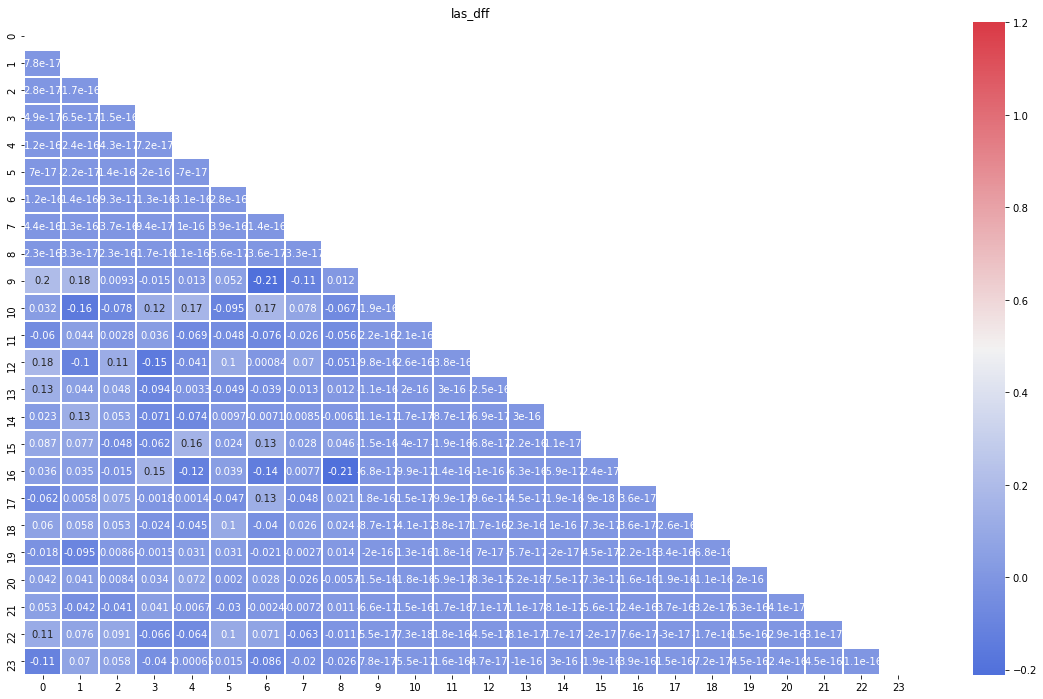

In [18]:

corrMatt = PCA_dff.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('las_dff')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

# Lasso

In [19]:
from sklearn.linear_model import LassoCV
model1 = LassoCV(cv=5, random_state=0, max_iter=10000)
model1.fit(PCA_dff, y_p)
model1.alpha_

0.00032219308321915967

In [20]:
# Set best alpha
from sklearn.linear_model import Lasso
lasso_best1 = Lasso(alpha=model1.alpha_)
lasso_best1.fit(PCA_dff, y_p)
lasso_best1.coef_

array([ 5.88783307e-02,  1.53350848e-01,  1.01015334e-01,  1.21689541e-01,
        5.73316096e-02, -3.03377941e-02,  1.34470491e-01, -2.87095026e-01,
       -9.50221200e-02, -1.20045484e-05,  2.15779339e-04, -5.84187346e-05,
       -0.00000000e+00,  2.49561632e-04,  3.20268474e-04,  3.49615352e-04,
        5.75699101e-05,  8.29634078e-04, -1.91321369e-04, -7.80939689e-05,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.07250761e-04])

In [21]:
col = PCA_dff.columns

a = lasso_best1.coef_
b = np.array(col)[a!=0]

las_dff = pd.DataFrame()
for i in range(len(b)):
    v=b[i]
    las_dff[i]= PCA_dff[v]

las_dff.shape

(395, 20)

EDA 

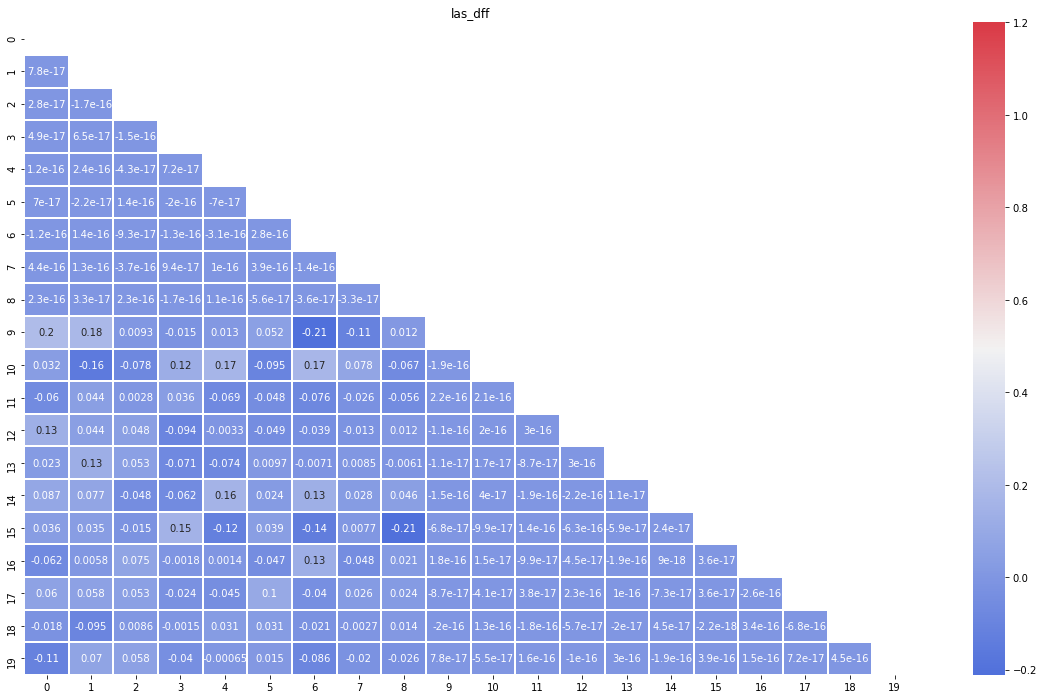

In [22]:
corrMatt = las_dff.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('las_dff')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

# Hyper parameter


In [23]:
X_train, X_test, y_train, y_test = train_test_split(las_dff, y_p, test_size = 0.1, random_state = 42)

In [24]:
param_grid = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': list(range(0, 15)),
    'max_leaf_nodes': list(range(0, 15)) 
} 

In [25]:
grid_search = GridSearchCV(RandomForestClassifier(), 
                           param_grid=param_grid) 
grid_search.fit(X_train, y_train) 
print(grid_search.best_estimator_) 

RandomForestClassifier(max_depth=7, max_features='sqrt', max_leaf_nodes=12)


RandomForestClassifier(max_depth=14, max_features='log2', max_leaf_nodes=13,
                       n_estimators=25)

In [26]:
rm = RandomForestClassifier(max_depth=14, max_features='log2', max_leaf_nodes=13,n_estimators=25, random_state=42)

rm.fit(X_train, y_train) 
y_pred_rand = rm.predict(X_test) 
print(balanced_accuracy_score(y_test, y_pred_rand))
print(classification_report(y_pred_rand, y_test)) 

0.9019607843137255
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        34
         1.0       0.83      0.83      0.83         6

    accuracy                           0.95        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.95      0.95      0.95        40



In [27]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rm, f)
    #pickle.dump(rama, open('rama.pkl', 'wb'))
    

# cross validation

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, make_scorer
scorer = make_scorer(balanced_accuracy_score)

n_folds = 5
model = RandomForestClassifier(max_depth=14, max_features='log2', max_leaf_nodes=13,n_estimators=25, random_state=42) 
scores = cross_val_score(model, las_dff, y_p, cv=5, scoring=scorer)
print(scores)
print(np.mean(scores))
avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
print('\n','RANDOM FOREST')
print("Average score and standard deviation: (%.2f +- %.3f)%%" %avg)

[0.88235294 0.88235294 0.97058824 0.97058824 0.79662698]
0.9005018674136321

 RANDOM FOREST
Average score and standard deviation: (90.05 +- 2.917)%


# cla

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPRegressor

# Define the first and second part of the pipeline
pipeline1 = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=9))
])

pipeline2 = Pipeline([
    ('scaler2', StandardScaler()),
    ('pca2', PCA(n_components=15))
])

# Combine both parts using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('first_split', pipeline1, slice(0, 12)),
        ('second_split', pipeline2, slice(12, X.shape[1]))
    ])

# Placeholder for the model, to be specified later
model_placeholder = RandomForestClassifier()  # Default model

# Final pipeline
final_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_placeholder)
])

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(['pCR (outcome)', 'RelapseFreeSurvival (outcome)'], axis=1)
y_pcr = df['pCR (outcome)']  

X_train_pcr, X_test_pcr, y_train_pcr, y_test_pcr = train_test_split(X, y_pcr, test_size=0.2, random_state=42)



In [34]:
# For predicting 'pCR (outcome)' - use RandomForestClassifier
final_pipeline.set_params(model=RandomForestClassifier(random_state=42))
final_pipeline.fit(X_train_pcr, y_train_pcr)
predictions_pcr = final_pipeline.predict(X_test_pcr)

In [35]:
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('first_split',
                                                  Pipeline(steps=[('scaler1',
                                                                   StandardScaler()),
                                                                  ('pca1',
                                                                   PCA(n_components=9))]),
                                                  slice(0, 12, None)),
                                                 ('second_split',
                                                  Pipeline(steps=[('scaler2',
                                                                   StandardScaler()),
                                                                  ('pca2',
                                                                   PCA(n_components=15))]),
                                                  slice(12, 117, None))])),
                ('model', Ra

In [36]:
with open("cl_model.pkl","wb") as f:
    pickle.dump(final_pipeline,f)